# `Prediction of Plant Nutrition`

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable as independent variables. Regression is used for To forecast a variable based on its relationship with another variable. In this cases, I used 4 different Regression model to get which one has the better result. The model was Linear regression, Decision Tree Regressor, Random Forest Regressor and Support Vector Regression. The target that we want to predict is plant nutritional data that has been obtained from the test lab. 

# Introduction

`Name : Aan Nurliyanah`

Hello, I'm Aan. I graduated from Hacktiv8 Data Science Bootcamp Batch 002 in December 2022. I have been a huge enthusiast yet been exploring the fields of Data Science and now seeking for new opportunities to challenge the confidence in my ability to perform as a Data Scientist due to my dedication and extensive education. During my studying period, I mastered the skills while still being eager to learn more.I believe my personality has also played a major role in my ability to succeed in this career. I am an extremely analytical, data-oriented, and calculated.

# External Link 

You can visit the deployment of the project via streamlit.app through this link:


https://nurliyanahaan-regression-app-bdkolm.streamlit.app/


# Working Area

## Import Libraries

In [68]:
#  using for calculation
import numpy as np
import pandas as pd

# using for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# using for spliting data
from sklearn.model_selection import train_test_split

!pip install feature-engine
# using for preprocessing data, feature selection, scaler, encoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# using for display pipeline
from sklearn import set_config
set_config(display='diagram')


# using for pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# using for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# using for model evaluation  
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# using for import model 
import pickle 

import random
import warnings
warnings.filterwarnings('ignore')


## Data Loading and Overview

Data details :

- **target** : contained information to predict plant nutrition
- **V1 - V8** : contained information about variable to predict plant nutrition
- **sample_type** : contained information about 2 different labs sample obtained

In [3]:
data = pd.read_excel('aria_data.xlsx')
data

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


Checking detail info from the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Checking central tendency 

In [5]:
data.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Checking missing value

In [6]:
data.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Checking duplicated data

In [7]:
data[data.duplicated()].shape

(0, 10)

Make a copy set from the original data.

In [8]:
data_new = data.copy()

Devide the data into categorical and numerical 

In [9]:
num = data_new[['target','v1','v2','v3','v4','v5','v6','v7','v8']].columns.tolist()
cat = data_new[['sample_type']].columns.tolist()

In [10]:
data_new[cat].value_counts()

sample_type
lab 1          100
lab 2           60
dtype: int64

General overview from the dataset :
- There is no missing value 
- There is no data duplicated 
- from central tendency we look there is large differences between Q3 and Q4, we will see further in outlier checking. 
- No need to do data cleaning 

## Exploratory Data Analysis (EDA)

We will see the visualization of sample_type coloumn 

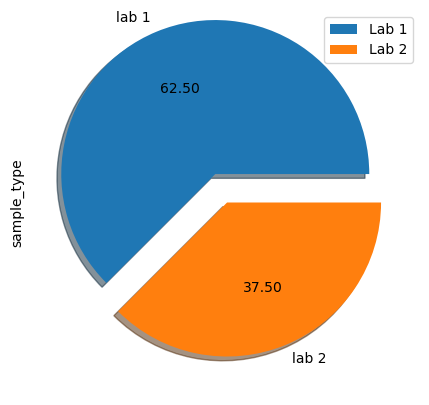

In [11]:
plt.figure(figsize = (8,5),facecolor='white')
data_new['sample_type'].value_counts().plot(kind = 'pie',explode = [0.2,0.0], shadow = True,autopct = "%.2f")
plt.legend(['Lab 1','Lab 2'])
plt.show()

The result is a dominance of the sample variables from Lab 1

Next, lets take a look visualization from variable v1 againts sample_type

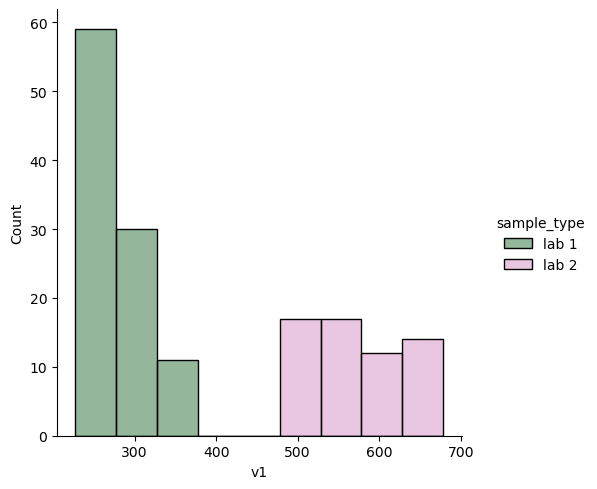

In [12]:
sns.displot(data=data_new, x='v1', hue='sample_type',palette='cubehelix')

For the variable v1 most populated from lab 1 as well, and the most value is about 250 

visualization of variable v2

<AxesSubplot: xlabel='v2', ylabel='Count'>

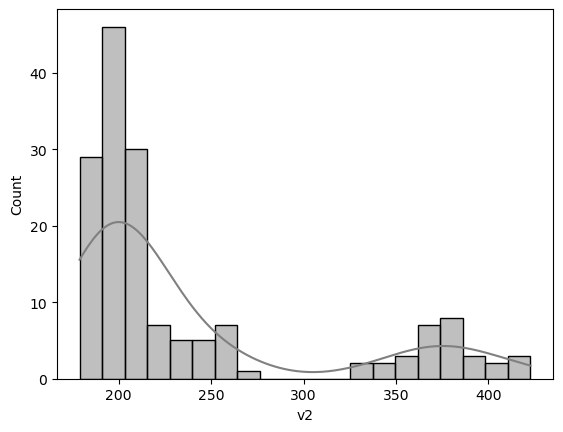

In [13]:
sns.histplot(data_new['v2'],kde=True,color='grey',bins=20)

We see that the value of the variable v2 is between 200-400 and mostly in 200. 

How if the variable which has large value from all variable, v8 againts the sample_type 

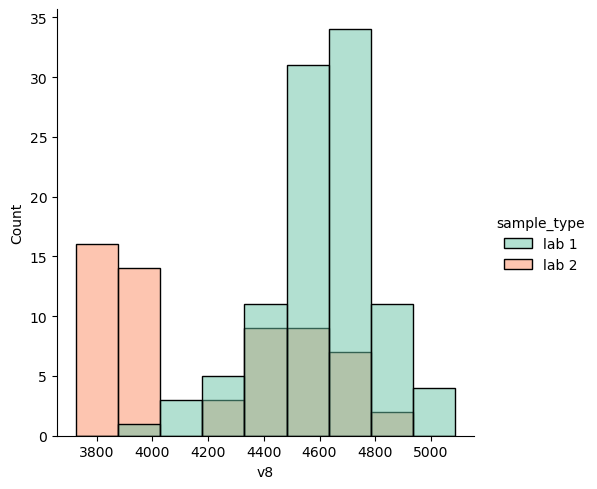

In [14]:
sns.displot(data=data_new, x='v8', hue='sample_type',palette='Set2')

As same as before, sample type dominate from lab1, and the peak of the value is about 4700 which have 33 counts data. 

Lets see the target 

<AxesSubplot: xlabel='target', ylabel='Count'>

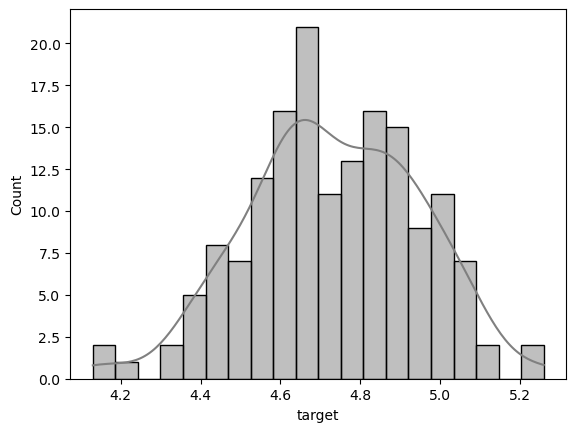

In [16]:
sns.histplot(data_new['target'],kde=True,color='grey',bins=20)

The value of the target is between 4.2 and 5.2, and the peak is around 4.7 . We can conclude that the best value of plant nutrition is about the range from 4.6 until 4.9 can be accepted or is good enough. 

General overview : 

- Every variable has different value that affect to plant nutrition
- The variable can be nitrogen, phosporus, pottasium, magnesium, sulfur, calcium etc
- The sample type is dominate from lab 1 
- The target has the range between 4.2 until 5.2 which is good if the value was between 4.6-4.9.

## Data Preprocessing

In [17]:
#prepare data for model inference
data_inf =data_new.sample(15,random_state=15)
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2
63,4.67,256.000000,201.375000,393.937500,361.875000,421.687500,223.875000,726.687500,4589.062500,lab 1
40,4.62,269.937500,200.875000,414.125000,384.812500,449.500000,250.062500,758.875000,4491.062500,lab 1
31,4.94,286.466667,197.266667,389.533333,342.266667,413.733333,195.066667,704.200000,4470.333333,lab 1
117,4.92,515.687500,189.375000,572.500000,355.375000,462.062500,192.687500,632.625000,4709.375000,lab 2
74,4.89,266.375000,186.625000,389.312500,381.625000,425.937500,222.562500,754.562500,4806.625000,lab 1
130,4.89,663.375000,422.812500,722.312500,541.750000,721.000000,415.375000,738.125000,3836.812500,lab 2
142,4.84,601.312500,369.687500,662.750000,482.812500,663.687500,355.625000,706.375000,3873.000000,lab 2
111,5.00,521.187500,202.437500,577.562500,369.125000,479.375000,197.500000,655.062500,4601.187500,lab 2
25,4.66,251.812500,182.625000,355.562500,332.500000,382.562500,200.187500,659.687500,4189.625000,lab 1


In [18]:

# Delete Inference-Set from Dataset

data_new = data_new.drop(data_inf.index)
data_new.head(2)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.6,199.0,391.333333,371.733333,466.8,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.2,194.6,393.666667,348.533333,401.8,220.066667,712.000000,4673.466667,lab 1


In [19]:

# Reset Index 

data_new.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2
1,4.67,256.000000,201.375000,393.937500,361.875000,421.687500,223.875000,726.687500,4589.062500,lab 1
2,4.62,269.937500,200.875000,414.125000,384.812500,449.500000,250.062500,758.875000,4491.062500,lab 1
3,4.94,286.466667,197.266667,389.533333,342.266667,413.733333,195.066667,704.200000,4470.333333,lab 1
4,4.92,515.687500,189.375000,572.500000,355.375000,462.062500,192.687500,632.625000,4709.375000,lab 2
5,4.89,266.375000,186.625000,389.312500,381.625000,425.937500,222.562500,754.562500,4806.625000,lab 1
6,4.89,663.375000,422.812500,722.312500,541.750000,721.000000,415.375000,738.125000,3836.812500,lab 2
7,4.84,601.312500,369.687500,662.750000,482.812500,663.687500,355.625000,706.375000,3873.000000,lab 2
8,5.00,521.187500,202.437500,577.562500,369.125000,479.375000,197.500000,655.062500,4601.187500,lab 2
9,4.66,251.812500,182.625000,355.562500,332.500000,382.562500,200.187500,659.687500,4189.625000,lab 1


In [20]:
data_new

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
140,4.79,624.200000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2
141,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
142,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
143,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2


### Spliting Data into Train and Test set 

In [21]:
fitur = data_new.drop('target', axis=1)
target = data_new['target']

In [22]:
x_train, x_test,  y_train, y_test = train_test_split(fitur,target,shuffle=False, test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116, 9)
(29, 9)
(116,)
(29,)


In [23]:
data_eda = pd.concat([x_train, y_train], axis=1)

Split into numerical and categorical data 

In [24]:
nums = data_eda[['target','v1','v2','v3','v4','v5','v6','v7','v8']].columns.tolist()
cats = data_eda[['sample_type']].columns.tolist()

We will see the skewness of numerical feature

In [25]:

skew = data_eda[nums].skew()
nilai_skew = pd.DataFrame(skew)
nilai_skew.columns =['skewness']

nilai_skew

,skewness
target,0.121651
v1,1.250424
v2,1.388351
v3,1.194871
v4,0.655152
v5,0.220314
v6,1.206743
v7,0.065579
v8,-0.406429


According to the skewness value , the dataset contains the distributions has skew, lets see the visualizations

In [26]:
numerical = data_eda[nums]

In [27]:

def diagnostic_plots(numerical, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_eda[variable])
    plt.title('Boxplot')

    plt.show()

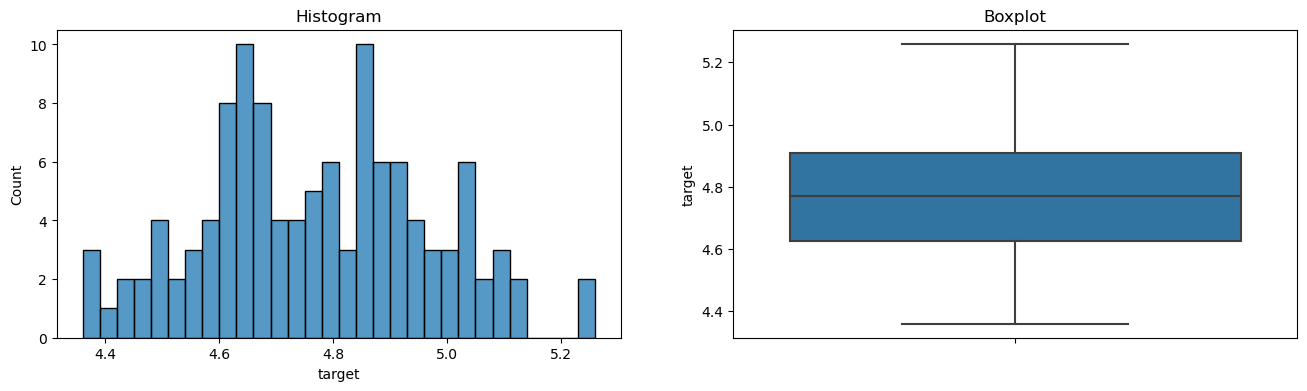

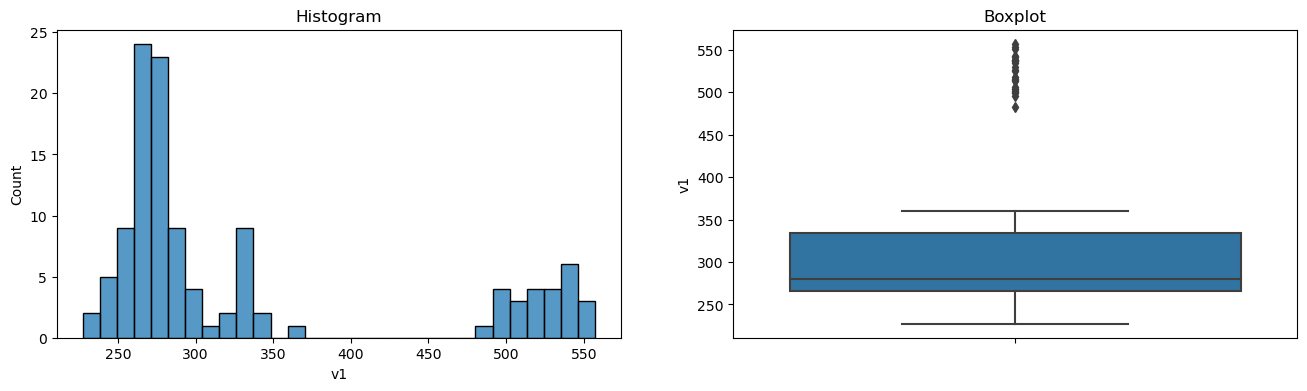

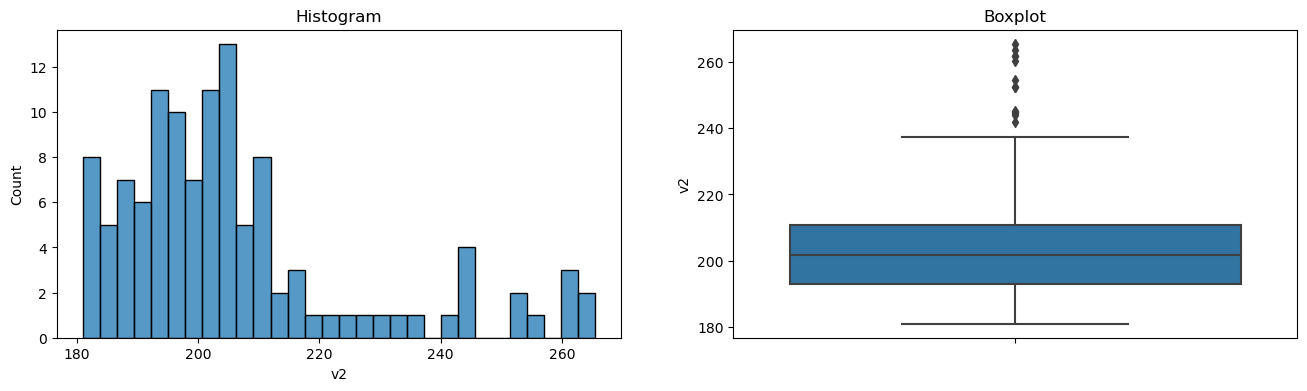

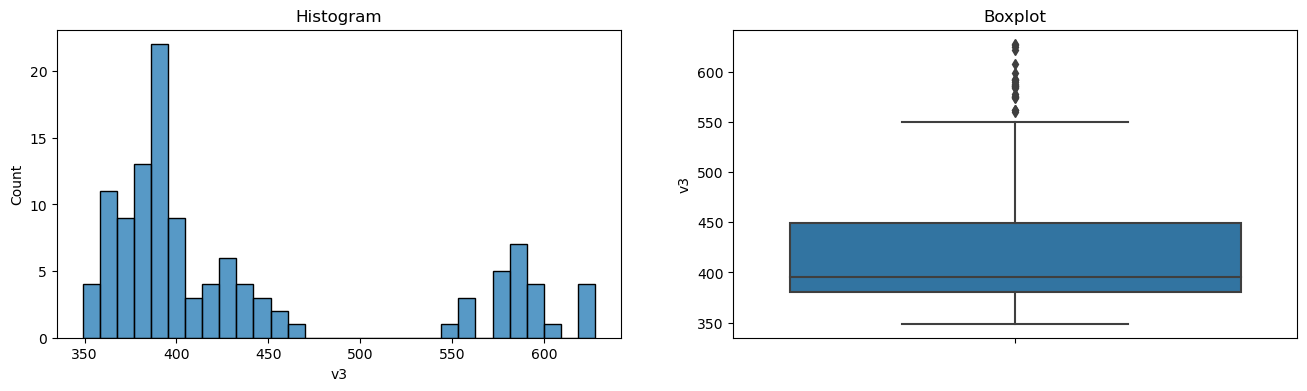

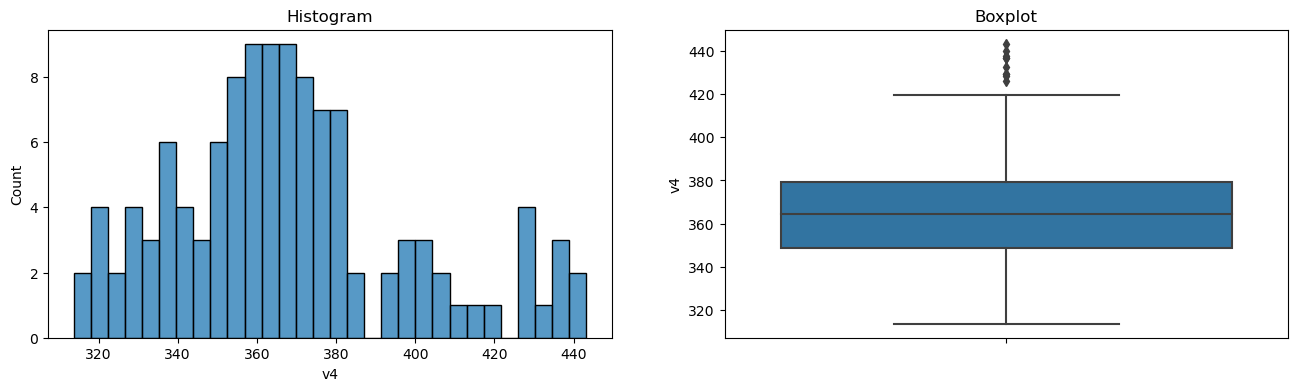

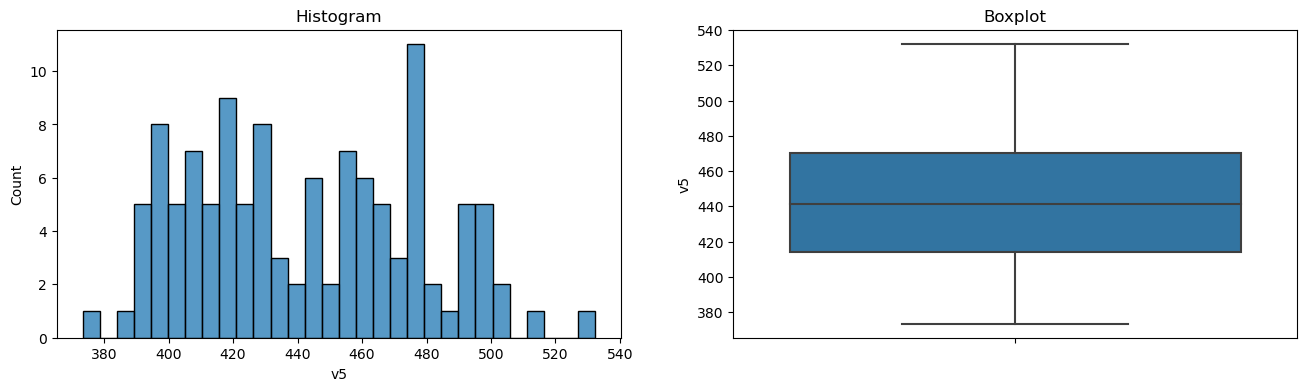

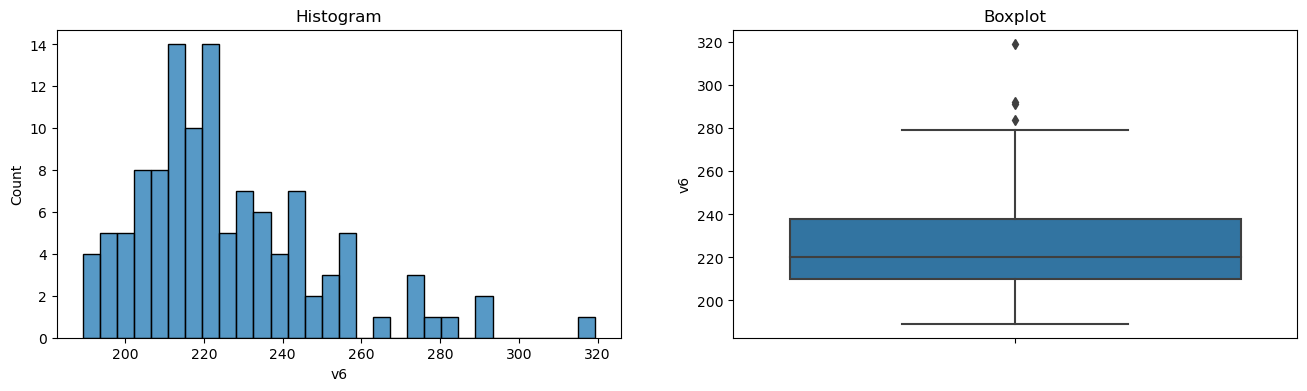

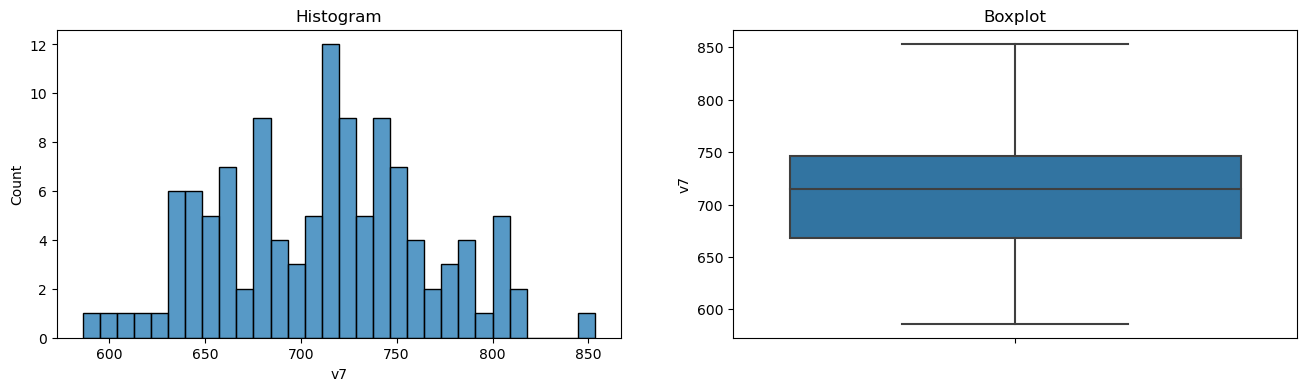

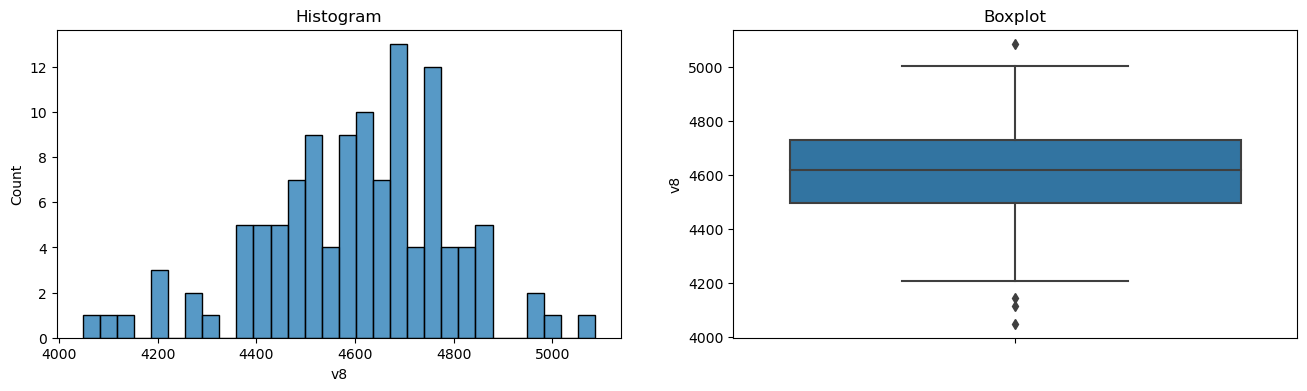

In [28]:
diagnostic_plots(numerical, 'target')
diagnostic_plots(numerical, 'v1')
diagnostic_plots(numerical, 'v2')
diagnostic_plots(numerical, 'v3')
diagnostic_plots(numerical, 'v4')
diagnostic_plots(numerical, 'v5')
diagnostic_plots(numerical, 'v6')
diagnostic_plots(numerical, 'v7')
diagnostic_plots(numerical, 'v8')


Checking the outlier

In [29]:
for k in numerical:
  Q3 = numerical[k].quantile(.75)
  Q1 = numerical[k].quantile(.25)

  IQR = Q3 - Q1

  upper = Q3 + (1.5 * IQR)
  lower = Q1 - (1.5 * IQR)

  outlier = numerical[(numerical[k] > upper) | (numerical[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/numerical.shape[0] * 100, '%')
  print('='*70)

target
count of outlier:  0
percent k of outlier:  0.0 %
v1
count of outlier:  25
percent k of outlier:  21.551724137931032 %
v2
count of outlier:  13
percent k of outlier:  11.206896551724139 %
v3
count of outlier:  24
percent k of outlier:  20.689655172413794 %
v4
count of outlier:  10
percent k of outlier:  8.620689655172415 %
v5
count of outlier:  0
percent k of outlier:  0.0 %
v6
count of outlier:  4
percent k of outlier:  3.4482758620689653 %
v7
count of outlier:  0
percent k of outlier:  0.0 %
v8
count of outlier:  4
percent k of outlier:  3.4482758620689653 %


there are some outlier in the several column, we will capping it in the next section , because the regression is sensitif about the outlier so we will handle it. 

### Feature Selection

#### Heatmap 

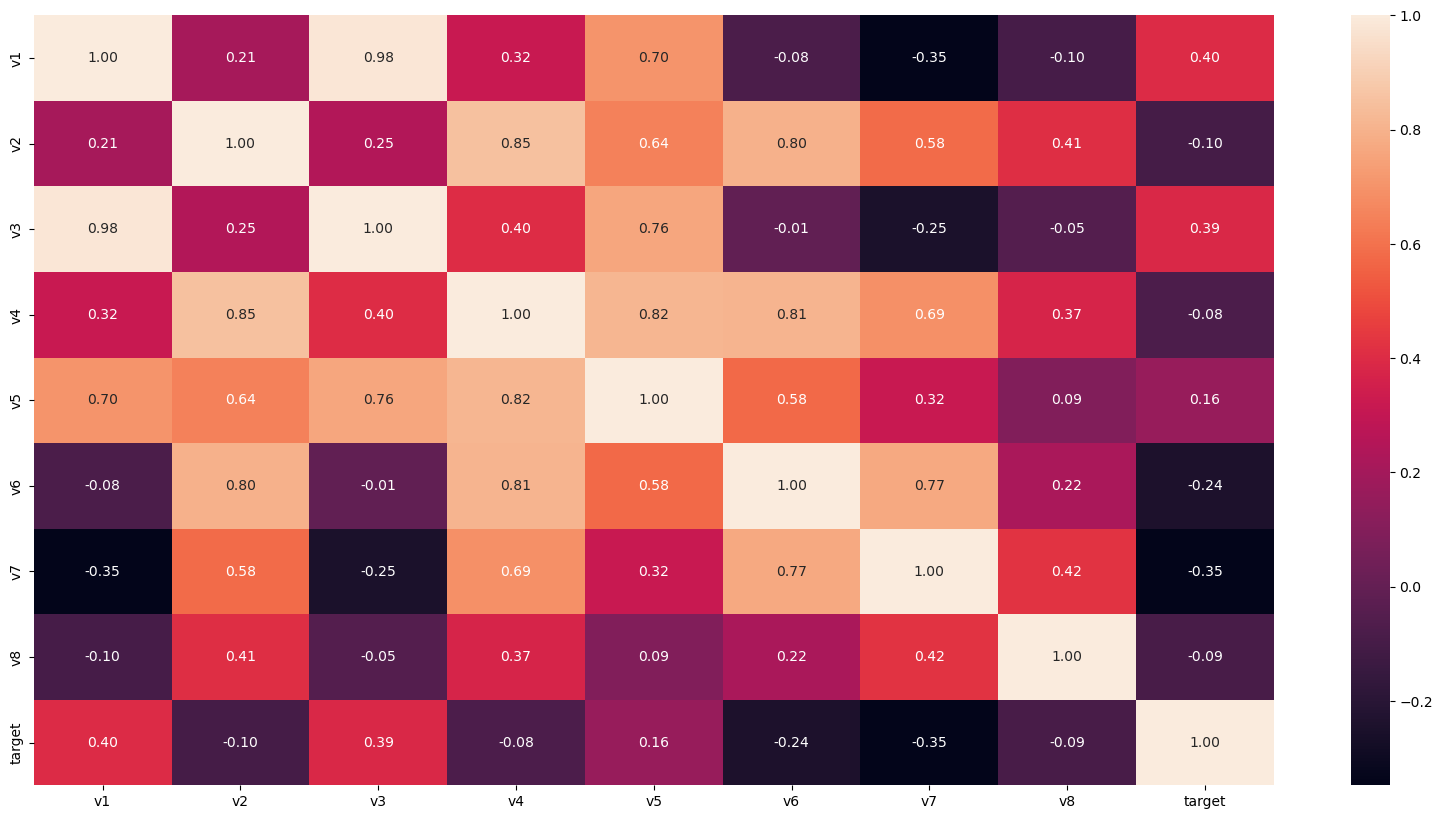

In [27]:
fig,ax = plt.subplots(figsize=[20,10])

corr = data_eda.corr()

ax = sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

The result from heatmap :
- the relation between variabel and target is weak, only v1,v3,v6,v7 which have rasult more than 0.1. We will consider it, and compare with another feature selection tools.
- there is multicollinearity  between v1 and v3 which have corelation value 0.98, also v2 and v4 have corelation about 0.85, and v6 and v2 have correlation about 80. We will consider to not to use both among them, because multicolenarity make the dependencies between the variable. 

#### feature Importances

We will use feature importances from Random Forest Regressor 

In [30]:
# split x dan y 
X_select = x_train.drop('sample_type',axis=1).copy()


Feature: 0, Score: 0.08
Feature: 1, Score: 0.12
Feature: 2, Score: 0.12
Feature: 3, Score: 0.07
Feature: 4, Score: 0.14
Feature: 5, Score: 0.13
Feature: 6, Score: 0.22
Feature: 7, Score: 0.13


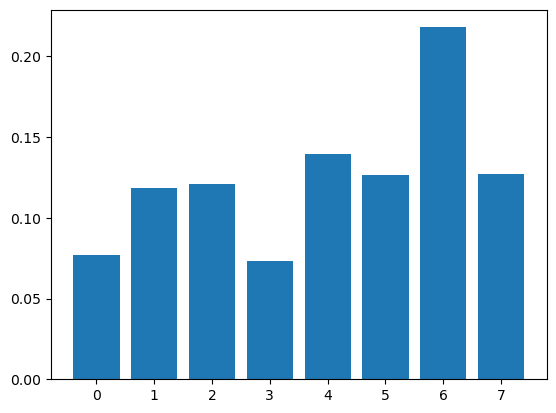

In [31]:
X, y = X_select, y_train
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We set the threshold > 0.1, so we will take v2,v3,v5,v6,v7,v8. 

Next, we will use feature importances from Decission Tree regressor 

Feature: 0, Score: 0.04
Feature: 1, Score: 0.14
Feature: 2, Score: 0.07
Feature: 3, Score: 0.14
Feature: 4, Score: 0.12
Feature: 5, Score: 0.16
Feature: 6, Score: 0.22
Feature: 7, Score: 0.11


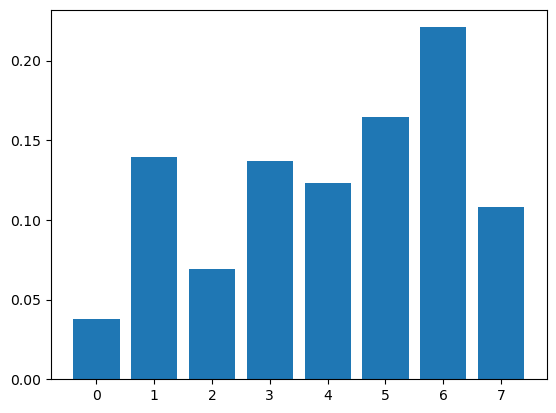

In [32]:
X, y = X_select, y_train
model = DecisionTreeRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We have the same threshold > 0.1, we will take v2,v4,v5,v6,v7,v8

#### ANOVA

Select features according to the k highest scores

In [35]:

f_test = SelectKBest(score_func=f_classif, k=3)
fit = f_test.fit(X_select, y_train)
fit.scores_

array([1.71091273, 0.95911124, 1.8012746 , 1.34702118, 1.60458101,
       1.75453146, 1.21388721, 0.90120264])

In [36]:
np.round_(fit.scores_)

array([2., 1., 2., 1., 2., 2., 1., 1.])

In [37]:
result = pd.Series(fit.scores_)
result.index = X_select.columns
result.sort_values(ascending=False)

v3    1.801275
v6    1.754531
v1    1.710913
v5    1.604581
v4    1.347021
v7    1.213887
v2    0.959111
v8    0.901203
dtype: float64

We will use the k above 1, we weill choose v1,v3,v4,v5,v6,v7

After comparing from the 4 tools that we used before, we choose the feature below:

v3,v5,v6,v7 and sample_type. 


### Pipeline


We use winsorizer with capping method iqr and fold 1.5 because the distribution was skew and the skewness is near 1, not too big. And for the scaler we use minmax scaler because we follow the distribution. For the categorical features we use ordinal encoder for sample type. And applying pipeline to feature that has been selected.

In [38]:
num_pipeline = Pipeline([
        ('outlier' , Winsorizer(capping_method='iqr', tail='both', fold=1.5,variables=['v3','v6'])),
        ('scaler', MinMaxScaler())
    ])

sample_type = ['lab 1','lab 2']
cat_pipeline = Pipeline([
        ('ord_enc', OrdinalEncoder(categories=[sample_type])) 
    ])


In [39]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['v3','v5','v6','v7']),
        ("cat_ord", cat_pipeline, ['sample_type']),
        ],verbose=True)

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['v3',
                                                                        'v6'])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['v3', 'v5', 'v6', 'v7']),
                                ('cat_ord',
                                 Pipeline(steps=[('ord_enc',
                                                  OrdinalEncoder(categories=[['lab '
                                                                              '1',
                                                                              'lab '
                                                                              '2']]))]),
                                 ['sample_type'])],
                  verbose=True)

In [40]:
X_train = full_pipeline.fit_transform(x_train[['v3','v5','v6','v7','sample_type']])
X_train

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 2) Processing cat_ord, total=   0.0s


array([[0.20981551, 0.58808725, 0.93098084, 0.58308383, 0.        ],
       [0.22136197, 0.17911074, 0.34237024, 0.47055888, 0.        ],
       [0.13129965, 0.28733221, 0.36529352, 0.34031936, 0.        ],
       [0.0979249 , 0.27614653, 0.07480876, 0.34539255, 0.        ],
       [0.03826824, 0.13380872, 0.07542498, 0.34006986, 0.        ],
       [0.07923065, 0.20204139, 0.23132791, 0.24101796, 0.        ],
       [0.05212398, 0.10151007, 0.02957842, 0.17215569, 0.        ],
       [0.08049526, 0.11073826, 0.14419481, 0.29091816, 0.        ],
       [0.15967093, 0.19001678, 0.31722858, 0.48003992, 0.        ],
       [0.17069897, 0.17587488, 0.08334777, 0.29867052, 0.        ],
       [0.14065463, 0.15744847, 0.20139737, 0.36042201, 0.        ],
       [0.05405624, 0.14756112, 0.16416024, 0.17623681, 0.        ],
       [0.12734086, 0.21728188, 0.25659281, 0.48652695, 0.        ],
       [0.06713437, 0.14340394, 0.20090219, 0.2074133 , 0.        ],
       [0.1930113 , 0.2299182 , 0.

In [41]:
X_test = full_pipeline.transform(x_test[['v3','v5','v6','v7','sample_type']])
X_test

array([[1.        , 0.83905726, 0.80749093, 0.36997879, 1.        ],
       [1.        , 0.86828859, 0.91175487, 0.62125749, 1.        ],
       [1.        , 2.0526164 , 1.        , 0.52248628, 1.        ],
       [1.        , 1.88470008, 1.        , 0.38588448, 1.        ],
       [1.        , 1.85559983, 1.        , 0.6209612 , 1.        ],
       [1.        , 1.82634228, 1.        , 0.49650699, 1.        ],
       [1.        , 1.97734899, 1.        , 0.66616766, 1.        ],
       [1.        , 1.95553691, 1.        , 0.73652695, 1.        ],
       [1.        , 1.78271812, 1.        , 0.48228543, 1.        ],
       [1.        , 2.0159396 , 1.        , 0.61427146, 1.        ],
       [1.        , 2.1351982 , 1.        , 0.69230289, 1.        ],
       [1.        , 2.05201342, 1.        , 0.64745509, 1.        ],
       [1.        , 1.92127202, 1.        , 0.45395147, 1.        ],
       [1.        , 1.77684564, 1.        , 0.51497006, 1.        ],
       [1.        , 2.14807047, 1.

## Model Definition

As we say before that we use 4 different model :
1. Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable that we want to predict is called the dependent variable. The variable that we are using to predict the other variable's value is called the independent variable.Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions
2. Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.
3. Random forest regression is used to solve a variety of business problems where the company needs to predict a continuous value
4. Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

In [42]:
lin_reg = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()

## Model Building

### Linear regression

In [43]:
lin_reg.fit(X_train,y_train)
pred_train_lr = lin_reg.predict(X_train)
pred_test_lr = lin_reg.predict(X_test)



In [44]:
MAE_lr = mean_absolute_error(y_train,pred_train_lr)
RMSE_lr = np.sqrt(mean_squared_error(y_train, pred_train_lr))
R2_lr = r2_score(y_train,pred_train_lr)

MAE_lr_test = mean_absolute_error(y_test,pred_test_lr)
RMSE_lr_test = np.sqrt(mean_squared_error(y_test, pred_test_lr))
R2_lr_test = r2_score(y_test,pred_test_lr)

### Decision Tree Regressor

In [45]:
dtr.fit(X_train,y_train)
pred_train_dt = dtr.predict(X_train)
pred_test_dt = dtr.predict(X_test)



In [46]:
MAE_dt = mean_absolute_error(y_train,pred_train_dt)
RMSE_dt = np.sqrt(mean_squared_error(y_train, pred_train_dt))
R2_dt = r2_score(y_train, pred_train_dt)

MAE_dt_test = mean_absolute_error(y_test,pred_test_dt)
RMSE_dt_test = np.sqrt(mean_squared_error(y_test, pred_test_dt))
R2_dt_test = r2_score(y_test,pred_test_dt)

### Random Forest Regressor

In [47]:
rfr.fit(X_train,y_train)
pred_train_rf = rfr.predict(X_train)
pred_test_rf = rfr.predict(X_test)



In [48]:
MAE_rf = mean_absolute_error(y_train,pred_train_rf)
RMSE_rf = np.sqrt(mean_squared_error(y_train, pred_train_rf))
R2_rf = r2_score(y_train, pred_train_rf)

MAE_rf_test = mean_absolute_error(y_test,pred_test_rf)
RMSE_rf_test = np.sqrt(mean_squared_error(y_test, pred_test_rf))
R2_rf_test = r2_score(y_test, pred_test_rf)

### Support Vector Regression

In [49]:
svr.fit(X_train,y_train)
pred_train_svr = svr.predict(X_train)
pred_test_svr = svr.predict(X_test)



In [50]:
MAE_svr = mean_absolute_error(y_train,pred_train_svr)
RMSE_svr = np.sqrt(mean_squared_error(y_train, pred_train_svr))
R2_svr = r2_score(y_train, pred_train_svr)

MAE_svr_test = mean_absolute_error(y_test,pred_test_svr)
RMSE_svr_test = np.sqrt(mean_squared_error(y_test, pred_test_svr))
R2_svr_test = r2_score(y_test, pred_test_svr)

In [51]:
# convert the result in to dataframe
    
predict = ['Linear Regresison','Decision Tree Regressor','Random Forest Regressor','SVR']
score = pd.DataFrame(predict)
score.rename(columns={0:'Model'},inplace = True)
score['MAE_TRAIN']= (MAE_lr,MAE_dt,MAE_rf,MAE_svr)
score['MAE_TEST']= (MAE_lr_test,MAE_dt_test,MAE_rf_test,MAE_svr_test)
score['RMSE_TRAIN']= (RMSE_lr,RMSE_dt,RMSE_rf,RMSE_svr)
score['RMSE_TEST']=(RMSE_lr_test,RMSE_dt_test,RMSE_rf_test,RMSE_svr_test)
score['R2_TRAIN']=(R2_lr,R2_dt,R2_rf,R2_svr)
score['R2_TEST']=(R2_lr_test,R2_dt_test,R2_rf_test,R2_svr_test)
score

,Model,MAE_TRAIN,MAE_TEST,RMSE_TRAIN,RMSE_TEST,R2_TRAIN,R2_TEST
0,Linear Regresison,0.142169,0.604911,0.172072,0.644608,0.237225,-7.332667
1,Decision Tree Regressor,0.000000,0.343793,0.000000,0.398025,1.000000,-2.176975
2,Random Forest Regressor,0.056958,0.281431,0.070138,0.338484,0.873270,-1.297572
3,SVR,0.130793,0.238434,0.160624,0.299086,0.335340,-0.793849


### Hyperparameter Tuning

In [52]:
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
            'fit_intercept': [True,False]        
            
        }  
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'min_samples_leaf' : [1,2,3]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [100, 500],
            'min_samples_leaf' : [1,2,3]
        }
    },    
    'svr': {
        'model': SVR(),
        'params' : {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid' ],
            'gamma' : [0.5,0.1],
            'epsilon' : [0.01,0.02]
        }
    }
}

In [53]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [54]:
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
score_df

,model,best_score,best_params
0,linear_regression,-0.227825,{'fit_intercept': True}
1,decision_tree,-0.922250,{'min_samples_leaf': 2}
2,random_forest,-0.473216,"{'min_samples_leaf': 3, 'n_estimators': 100}"
3,svr,-0.231430,"{'epsilon': 0.02, 'gamma': 0.5, 'kernel': 'rbf'}"


In conclusion, R² is the ratio between how good our model is vs how good the naive average model is.

Common misconception: Many articles on the web claim that the R² range lies between 0 and 1 which is not true. The maximum value of R² is 1 but the minimum can be minus infinity.

In [55]:
svr_tuned = clf.best_estimator_
svr_tuned.fit(X_train, y_train)

SVR(epsilon=0.02, gamma=0.5)

In [56]:
pred_train_svr = svr_tuned.predict(X_train)
pred_test_svr = svr_tuned.predict(X_test)

print("="*20,"TRAINING","="*20)
print("MAE:",mean_absolute_error(y_train,pred_train_svr))
print("RMSE :",np.sqrt(mean_squared_error(y_train, pred_train_svr)))
print(' ')
print("="*20,"TEST","="*20)
print("MAE:",mean_absolute_error(y_test,pred_test_svr))
print("RMSE :",np.sqrt(mean_squared_error(y_test, pred_test_svr)))

==================== TRAINING ====================
MAE: 0.12975641703381235
RMSE : 0.16897076044281048
 
==================== TEST ====================
MAE: 0.3690453678090226
RMSE : 0.4225275951666982


After we do some hyperparameter tuning we conclude that the result is worse than the baseline model, the R2 score much better but the MAE and RMSE is not good enough, so we continue to use the base line model of the SVR. 

### Predict

In [57]:
all_process = Pipeline([
    ("preprocessing", full_pipeline),
    ("regression", svr)
])
all_process


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['v3',
                                                                                         'v6'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['v3', 'v5', 'v6', 'v7']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['lab '
                                                                                               '1',
                                                                                               'lab '
                                                                                               '2']]))]),
                                                  ['sample_type'])],
                                   verbose=True)),
                ('regression', SVR())])

In [58]:
all_process.fit(x_train, y_train)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ....... (2 of 2) Processing cat_ord, total=   0.0s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['v3',
                                                                                         'v6'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['v3', 'v5', 'v6', 'v7']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['lab '
                                                                                               '1',
                                                                                               'lab '
                                                                                               '2']]))]),
                                                  ['sample_type'])],
                                   verbose=True)),
                ('regression', SVR())])

In [59]:
test = all_process.predict(x_test)

In [60]:
train = all_process.predict(x_train)

In [61]:
print('train: ', mean_absolute_error(y_train, train))
print('test: ', mean_absolute_error(y_test, test))

train:  0.13079347017947057
test:  0.2384335600397305


In [69]:
print('MAE: ', mean_absolute_error(y_test, test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, test)))
print('MAPE:', mean_absolute_percentage_error(y_test, test))


MAE:  0.2384335600397305
RMSE:  0.2990864357677822
MAPE: 0.05389672080891075


The MAE and RMSE result is still lower which is 0.2 . The MAPE result show that the error result is 5.3 %, Which means the accuracy of prediction is 94.7 %. Overall SVR is prety good in result. We would like to use this model into inference.

### Inference

In [62]:
data_inf

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2
1,4.67,256.000000,201.375000,393.937500,361.875000,421.687500,223.875000,726.687500,4589.062500,lab 1
2,4.62,269.937500,200.875000,414.125000,384.812500,449.500000,250.062500,758.875000,4491.062500,lab 1
3,4.94,286.466667,197.266667,389.533333,342.266667,413.733333,195.066667,704.200000,4470.333333,lab 1
4,4.92,515.687500,189.375000,572.500000,355.375000,462.062500,192.687500,632.625000,4709.375000,lab 2
5,4.89,266.375000,186.625000,389.312500,381.625000,425.937500,222.562500,754.562500,4806.625000,lab 1
6,4.89,663.375000,422.812500,722.312500,541.750000,721.000000,415.375000,738.125000,3836.812500,lab 2
7,4.84,601.312500,369.687500,662.750000,482.812500,663.687500,355.625000,706.375000,3873.000000,lab 2
8,5.00,521.187500,202.437500,577.562500,369.125000,479.375000,197.500000,655.062500,4601.187500,lab 2
9,4.66,251.812500,182.625000,355.562500,332.500000,382.562500,200.187500,659.687500,4189.625000,lab 1


In [63]:
X_inf = data_inf.drop('target',axis=1).copy()

In [64]:
hasil = all_process.predict(X_inf)
hasil

array([4.78753538, 4.68532761, 4.64972358, 4.85736504, 4.92410659,
       4.65697626, 4.79536718, 4.78618118, 4.91628507, 4.83876855,
       4.81127566, 4.7529628 , 4.60818084, 4.86915964, 4.7508543 ])

In [65]:
hasil_inf = pd.DataFrame(hasil, columns=['hasil prediksi'])
hasil_inf.head()

,hasil prediksi
0,4.787535
1,4.685328
2,4.649724
3,4.857365
4,4.924107


In [66]:
hasil_inf['Real Data'] = data_inf['target']
hasil_inf

,hasil prediksi,Real Data
0,4.787535,4.35
1,4.685328,4.67
2,4.649724,4.62
3,4.857365,4.94
4,4.924107,4.92
5,4.656976,4.89
6,4.795367,4.89
7,4.786181,4.84
8,4.916285,5.00
9,4.838769,4.66


In [67]:
pickle.dump(all_process, open('pipeline.pkl','wb'))

# Conclusion

- The Regression model work quite good in predict the target, I compare results from all algorithms which is linear regression, decision tree regressor, random forest regressor and SVR and get different results. The SVR algorithm gives better results than the all algorithms in this cases. 
- The MAPE result show that the error result 5.3% Which means the accuracy of prediction is 94.7 %
- The SVR model is robust to outliers. Decision model can be easily updated. It has excellent generalization capability, with high prediction accuracy.
- The limitation of this algorithm is They are not suitable for large datasets. In cases where the number of features for each data point exceeds the number of training data samples, the SVR will underperform.
- For the future improvement,  try to use another model and improve the parameters, choosing feature selection more deeper and minimize the error.